In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
X = [1, 2, 9, 12, 20]
columns = ['data']
df = pd.DataFrame(X, columns=columns)
df

,data
0,1
1,2
2,9
3,12
4,20


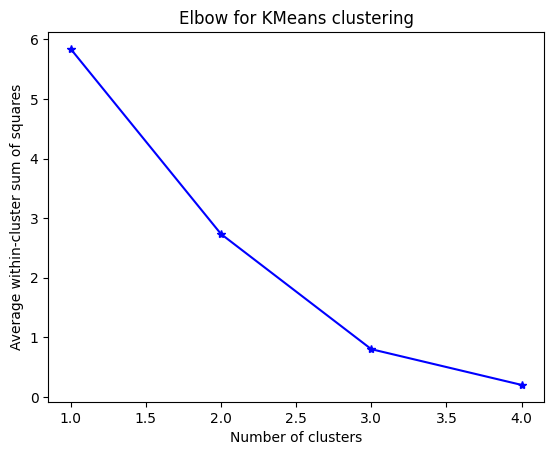

In [ ]:
# create and plot multiple k-means models and plot
# find the optimal number of clusters
kMeans_models = [KMeans(n_clusters=k, n_init=1).fit(df) for k in range(1, 5)]
centroids = [model.cluster_centers_ for model in kMeans_models]

from scipy.spatial.distance import cdist
D_k = [cdist(df, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/df.shape[0] for d in dist]

plt.plot(range(1, 5), avgWithinSS, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

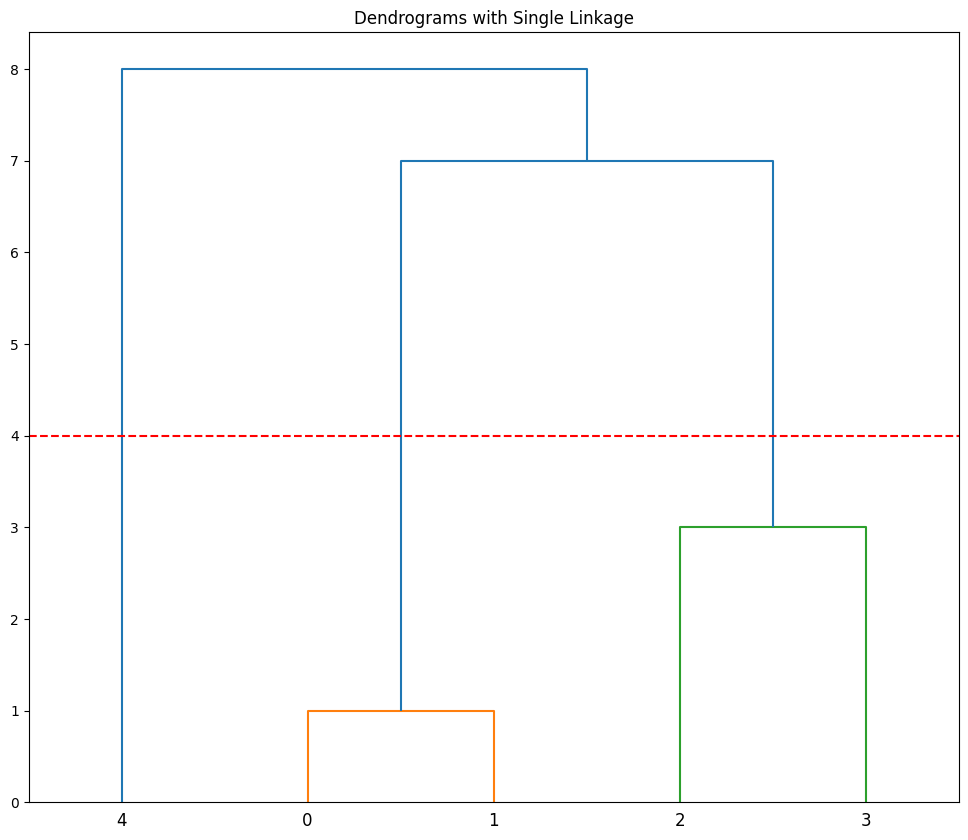

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Dendrograms with Single Linkage")
dend = shc.dendrogram(shc.linkage(df, method="single"))
plt.axhline(y=4, color="r", linestyle="--")

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="single")
cluster.fit_predict(df)

array([2, 2, 0, 0, 1])

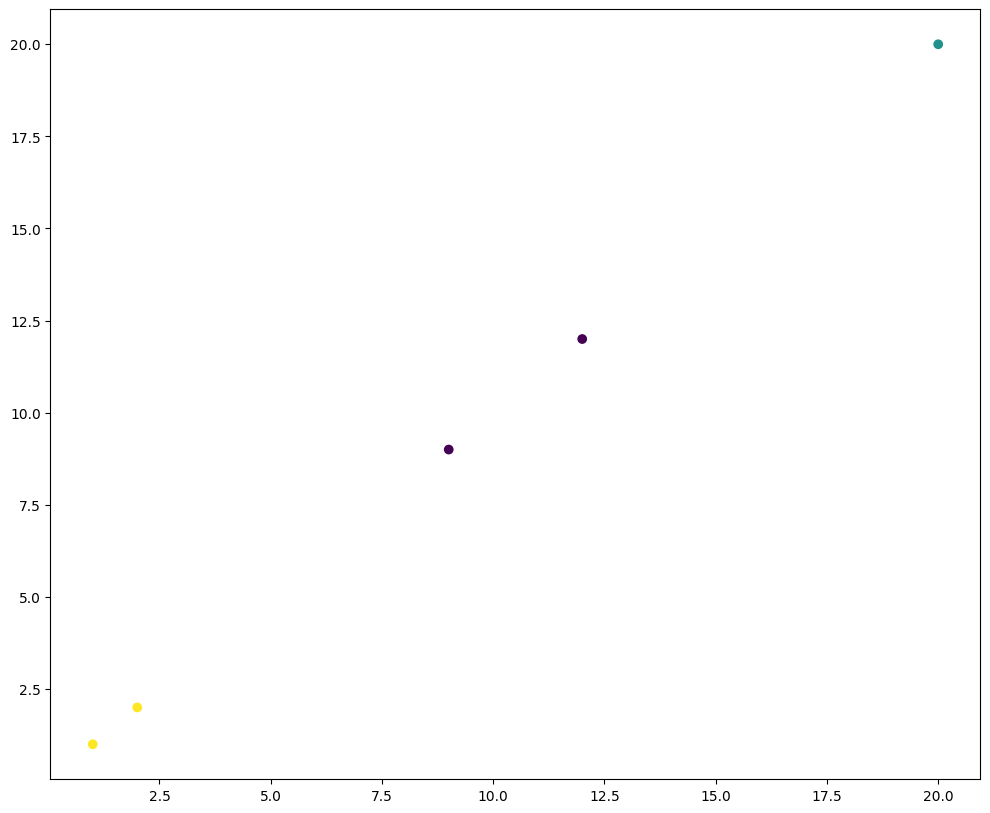

In [ ]:
# plot the clusters
plt.figure(figsize=(12,10))
plt.scatter(df['data'], df['data'], c=cluster.labels_, cmap='viridis')
plt.show()


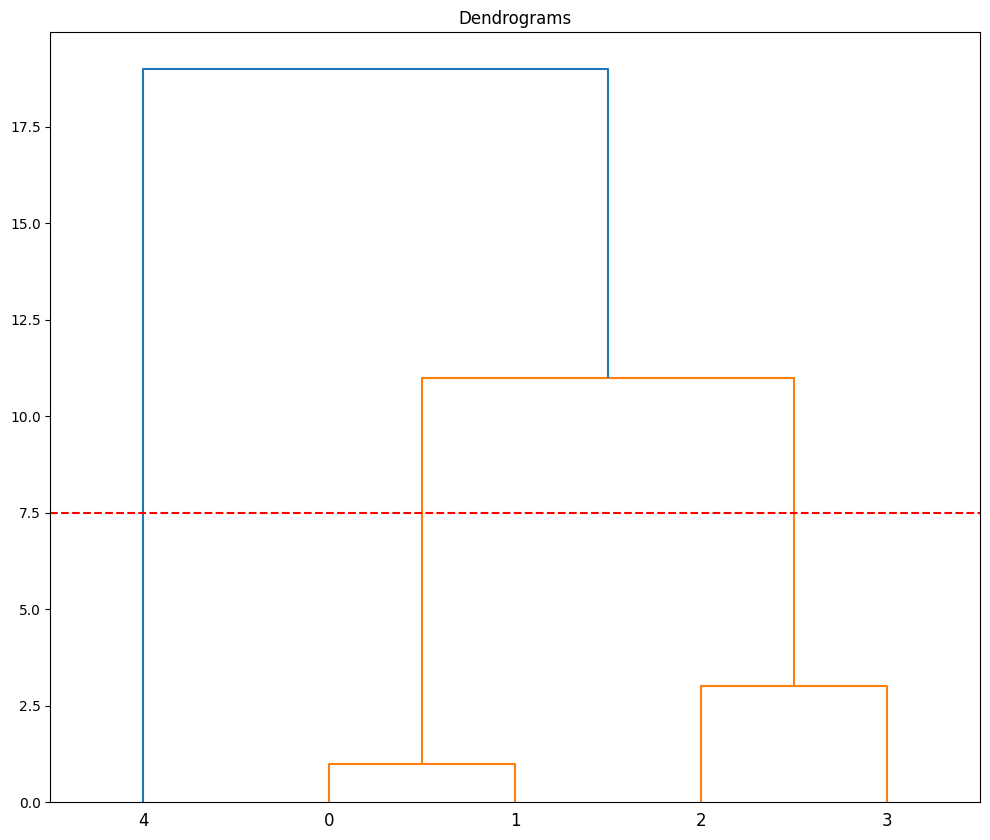

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Dendrograms with complete ")
dend = shc.dendrogram(shc.linkage(df, method="complete"))
plt.axhline(y=7.5, color="r", linestyle="--")

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="complete")
cluster.fit_predict(df)

array([2, 2, 0, 0, 1])

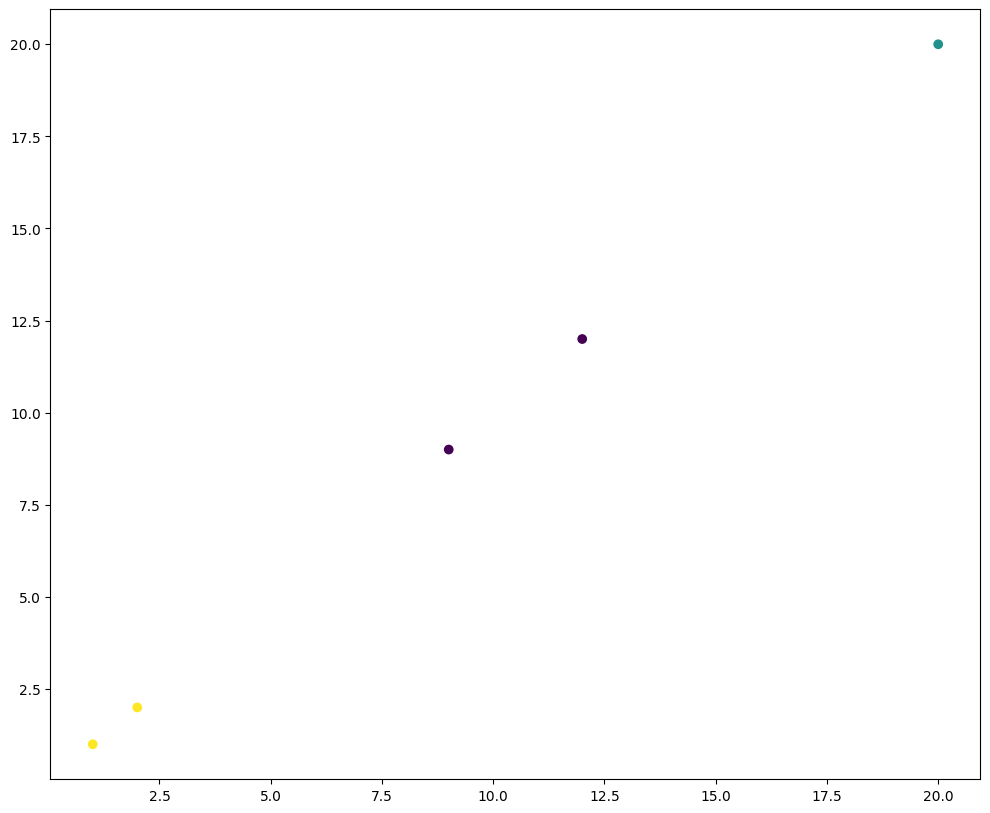

In [ ]:
# plot the clusters
plt.figure(figsize=(12,10))
plt.scatter(df['data'], df['data'], c=cluster.labels_, cmap='viridis')
plt.show()